# Use Case: <font color="#C70039">Interpretable Machine Learning with LIME for tabular data</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Marvin Reuter
* Matriculation number: 11139466
* Date:   24.11.2024

<img src="https://miro.medium.com/max/664/1*J1V-RIBHIcX-Aej0x7UXnA.png" style="float: center;" width="600">

---------------------------------

### Description 
This is one implementation example for LIME interpreting a random forest ensemble model that predicts tabular data. 
Please try to understand the implementation.

---------------------------------

### Imports
Import all necessary python utilities for loading, preprocessing and predicting the data. 

### <font color="FF0000">TASKS</font>
Try out other tabular data sets (e.g. stroke data set).

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular

### Load and preprocess the data

In [2]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Prepare data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Set up the model and train

In [3]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Create LIME tabular explainer

[('petal width (cm) <= -1.18', -0.20564778651966645), ('-1.28 < petal length (cm) <= 0.30', 0.19976214279472157), ('sepal length (cm) <= -0.86', -0.04547046095360647), ('-0.14 < sepal width (cm) <= 0.76', 0.015745375198828473)]


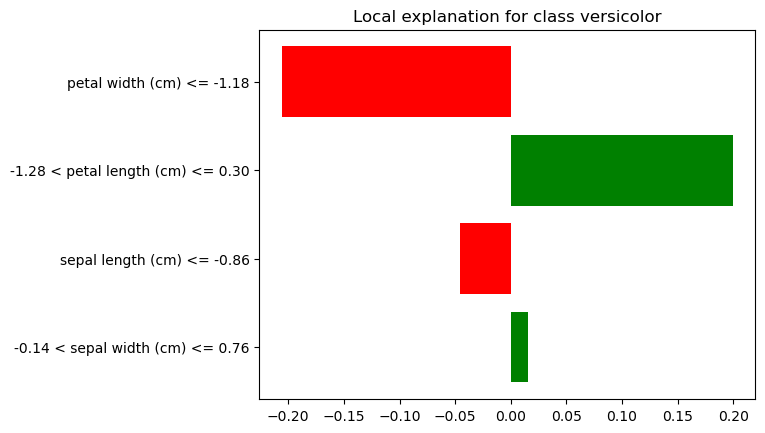

In [4]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=iris.target_names,
    mode='classification'
)

# Choose an instance to explain
instance = X_test_scaled[20]

# Generate explanation
exp = explainer.explain_instance(instance, rf_model.predict_proba, num_features=4)

# Visualize explanation
exp.as_pyplot_figure()

# Print feature importance
print(exp.as_list())

## TASK

### Step 1: Load and preprocess data

In [18]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

def convert_to_numeric(df):
    """Converts categorical columns to numeric representations."""

    for col in df.columns:
        if df[col].dtype == object:  # Check if the column is of type 'object' (string)
            unique_vals = df[col].unique()
            mapping = {val: i for i, val in enumerate(unique_vals)}
            df[col] = df[col].map(mapping)  # Efficiently replace values using a mapping
    return df

df_numeric = convert_to_numeric(df.copy())  # Create a copy to avoid modifying the original


# Handling missing values (NaN) - Choose one of the following strategies:
df_numeric.fillna(df_numeric.median(), inplace=True) # Median



print("\nDataFrame with imputed missing values:")
df_numeric.head(10)


DataFrame with imputed missing values:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,28.1,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,0,81.0,0,0,0,0,0,186.21,29.0,0,1
6,53882,0,74.0,1,1,0,0,1,70.09,27.4,1,1
7,10434,1,69.0,0,0,1,0,0,94.39,22.8,1,1
8,27419,1,59.0,0,0,0,0,1,76.15,28.1,3,1
9,60491,1,78.0,0,0,0,0,0,58.57,24.2,3,1


In [30]:
# Prepare data
X = df_numeric.drop('stroke', axis=1)
y = df_numeric['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 2: Setup and training

In [31]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Step 3: Create LIME tabular explainer

[('hypertension <= -0.32', -0.04761225832520826), ('-0.81 < age <= 0.08', -0.0425206196303956), ('heart_disease <= -0.24', -0.04162681231812905), ('ever_married <= -0.73', -0.019851041135701436)]
id                          12109
gender                     Female
age                          81.0
hypertension                    1
heart_disease                   0
ever_married                  Yes
work_type                 Private
Residence_type              Rural
avg_glucose_level           80.43
bmi                          29.7
smoking_status       never smoked
stroke                          1
Name: 10, dtype: object


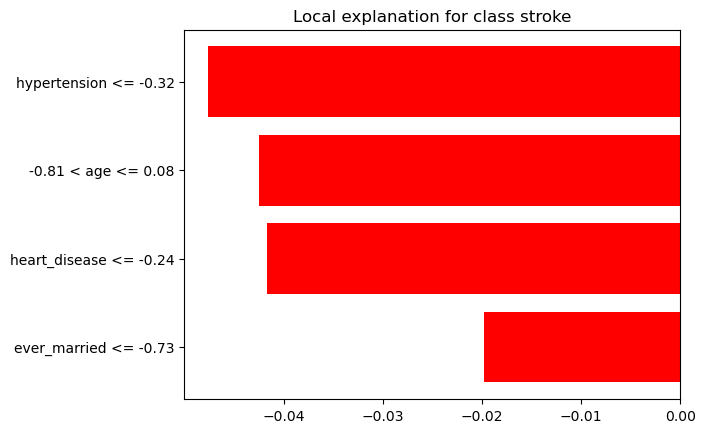

In [40]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['No stroke', 'stroke'],
    mode='classification'
)

# Choose an instance to explain
instance = X_test_scaled[10]

# Generate explanation
exp = explainer.explain_instance(instance, rf_model.predict_proba, num_features=4)

# Visualize explanation
exp.as_pyplot_figure()

# Print feature importance
print(exp.as_list())
print(df.iloc[10])